### Polynomial Regression

In [1]:
!pip install -U scikit-learn
%pip install tqdm
%pip install pandas
%pip install seaborn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [3]:
from tqdm import tqdm

import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [4]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [5]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
encoded_car_data = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv'

In [10]:
data = pd.read_csv(encoded_car_data)
data

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,2952.0,141.0,3.78,114.0,188.8,68.9,23.0,28.0,16845.0
201,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,3049.0,141.0,3.78,160.0,188.8,68.8,19.0,25.0,19045.0
202,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,3012.0,173.0,3.58,134.0,188.8,68.9,18.0,23.0,21485.0
203,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,3217.0,145.0,3.01,106.0,188.8,68.9,26.0,27.0,22470.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

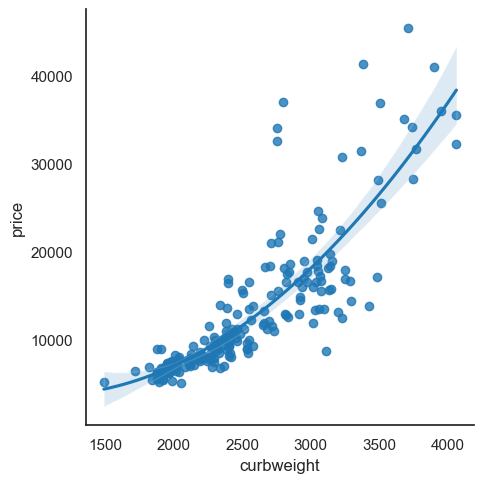

In [12]:
sns.lmplot(x = 'curbweight', y = 'price', data = data, order=2)

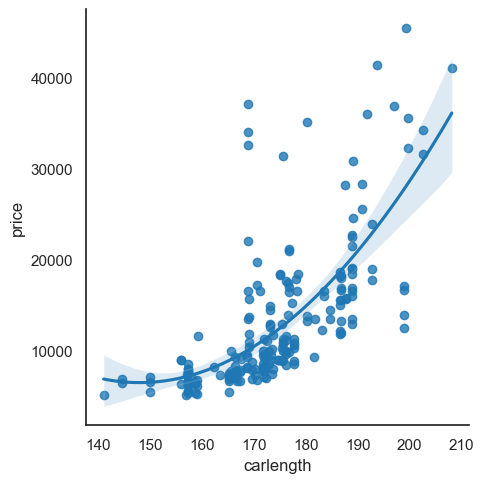

In [13]:
sns.lmplot(x = 'carlength', y = 'price', data = data, order=2)

#### Exercise 1
In this Exercise, visualize the relationship between the 'horsepower' and the target variable, 'price'.

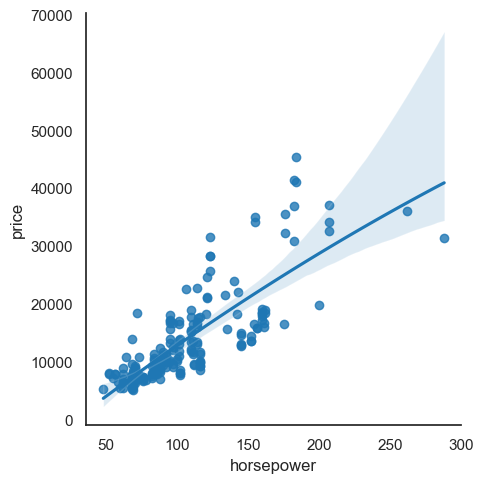

In [14]:
sns.lmplot(x = 'horsepower', y = 'price', data = data, order=2)



#### Data Preparation
Let's first split our data into X features and y target

In [15]:
X = data.drop('price', axis=1)
y = data.price

#### Train Test Split
Now that we have split our data into training and testing sets, the training data is used for your model to recognize patterns using some criteria,the test data set it used to evaluate your model, as shown in the following image:

Now, we split our data, using train_test_split function, into the training and testing sets, allocating 30% of the data for testing.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])

Number of test samples: 62
Number of training samples: 143


#### Multiple Features
Let's create a LinearRegression object, called lm.

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
predicted = lm.predict(X_test)

Let's calculate the r2_score() on both, training and testing data sets.

In [20]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.9262649047364463
R^2 on testing data  0.8470389329624963


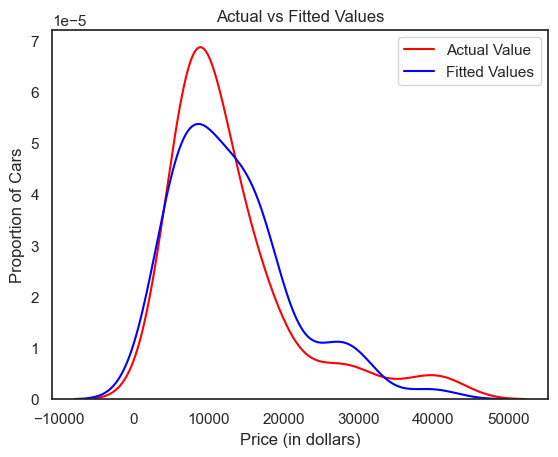

In [22]:
plot_dis(y_test,predicted)

Below, we will view the estimated coefficients for the linear regression problem.

In [23]:
{col:coef for col,coef in zip(X.columns, lm.coef_)}

{'diesel': 173509577697600.53,
 'gas': 173509577696059.28,
 'std': 309.004638671875,
 'turbo': -302.64129638671875,
 'convertible': 1795.7911109924316,
 'hardtop': 3141.6799850463867,
 'hatchback': -1754.9297180175781,
 'sedan': -688.9752197265625,
 'wagon': -2490.9208450317383,
 '4wd': -616.8678550720215,
 'fwd': -260.45056915283203,
 'rwd': 878.8708572387695,
 'dohc': 2454.795196533203,
 'dohcv': -13265.955434322357,
 'l': 2122.02685546875,
 'ohc': 4635.252391815186,
 'ohcf': 6086.872917175293,
 'ohcv': -2818.2317543029785,
 'rotor': 781.234260559082,
 'eight': 9202.421216964722,
 'five': -2732.0841331481934,
 'four': -5311.960720062256,
 'six': -2148.435649871826,
 'three': -0.0003662109375,
 'twelve': 208.84706926345825,
 'two': 781.230354309082,
 'wheelbase': 101.63720703125,
 'curbweight': 4.90625,
 'enginesize': 23.51318359375,
 'boreratio': -1781.988525390625,
 'horsepower': 68.4140625,
 'carlength': -65.31640625,
 'carwidth': 579.999755859375,
 'citympg': -159.37841796875,
 'h

As we see, the first two coefficients are too large to plot, so we'll drop them and plot the rest of the coefficients

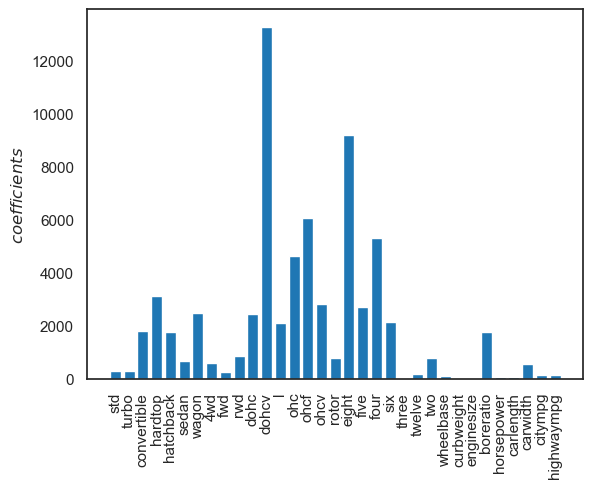

In [24]:
plt.bar(X.columns[2:],abs(lm.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.show()

Usually, we can interpret the lager coefficients as having more importance on the prediction, but this is not always the case, so let's look at the individual features.

#### Individual Features
We can train the model and plot our 
 for each of the features on the training and testing data sets, using the function get_R2_features.

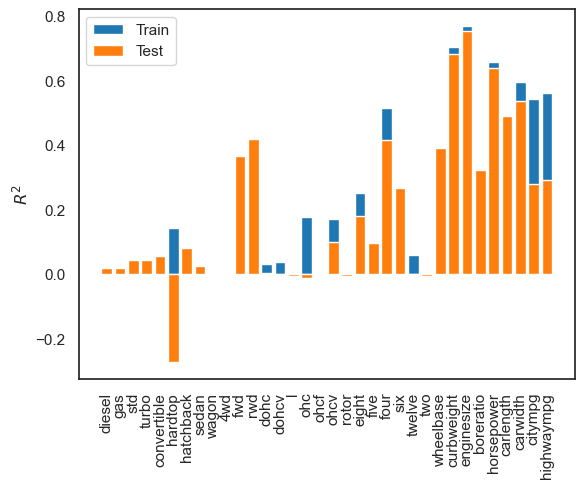

Training R^2 mean value 0.21817773426877915 Testing R^2 mean value 0.18241493035139264 
Training R^2 max value 0.7686929078033781 Testing R^2 max value 0.7534902447506854 


In [25]:
get_R2_features(lm)

From the above plot, we see that some individual features perform similarly to using all the features (we removed the feature three ), in addition, we see that smaller coefficients seem to correspond to a larger 
, therefore larger coefficients correspond to overfiting.

#### Exercise 2
In this Exercise, calculate the 
 using the object Pipeline for Linear Regression and apply StandardScaler() to all features, then use the function plot_dis to compare the predicted values versus the actual values.

R^2 on training  data  0.9252100825954781
R^2 on testing data  -6.03498866940806e+22


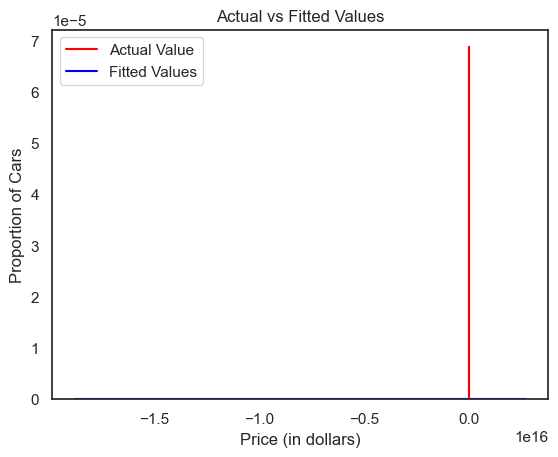

In [26]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
print("R^2 on training  data ", pipe.score(X_train, y_train))
print("R^2 on testing data ", pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
plot_dis(y_test,predicted)

#### Exercise 3
In this Exercise, calculate the 
 using the object Pipeline with StandardScaler() for each individual features using the function get_R2_features.

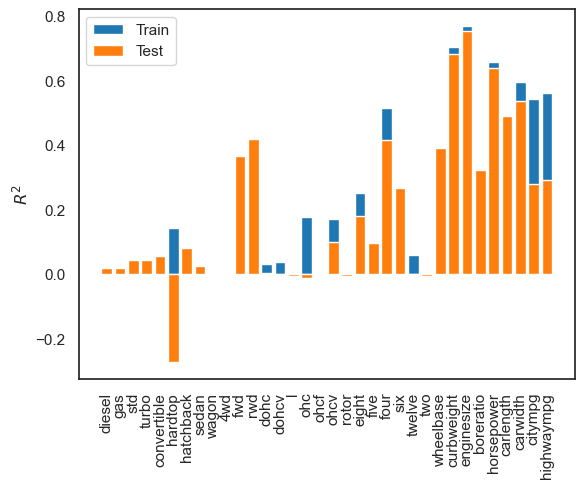

Training R^2 mean value 0.21817773426877918 Testing R^2 mean value 0.18241493035139267 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [27]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
get_R2_features(pipe)

#### Polynomial Features   
#### Multiple Features
Polynomial transform is a simple way to increase the complexity of the model, but we must be mindful of overfilling. Below, we will perform a second degree (degree=2) polynomial transformation.

In [28]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [29]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

X_train_poly and X_test_poly now contain the original features of X plus the square of these features and the cross-terms combination. Let's check the shape of the newly created train and test sets.

In [30]:
print(X_train_poly.shape)

(143, 665)


In [31]:
print(X_test_poly.shape)

(62, 665)


Altogether, we have 665 features. Now, we fit the model with the newly created features.

In [32]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
predicted = lm.predict(X_train_poly)

In [34]:
print("R^2 on training data:", lm.score(X_train_poly, y_train))
print("R^2 on testing data:", lm.score(X_test_poly,y_test))

R^2 on training data: 0.9985318497975861
R^2 on testing data: -36729.957442612445


#### Individual Features
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use PolynomialFeatures as a step in our pipeline.

In [35]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]

In [36]:
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [37]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.9985318497975861
R^2 on testing data: -36729.957442612445


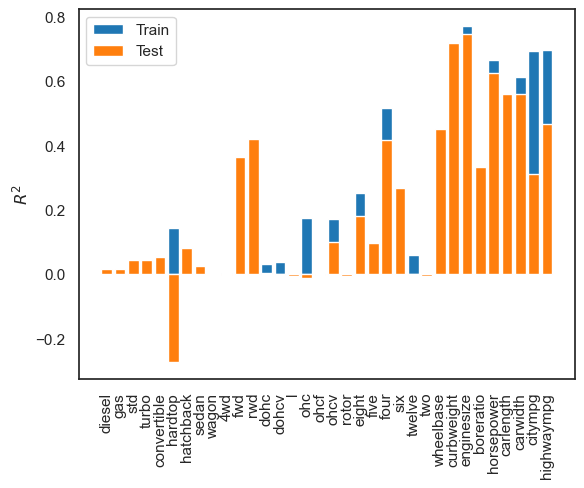

Training R^2 mean value 0.2308332784888854 Testing R^2 mean value 0.193919791945583 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614307 


In [38]:
get_R2_features(pipe)

#### GridSearch and Pipeline
In this section of the notebook, we will define a pipeline object, then use GridSearch to find the best hyper-parameters of the model by using cross-validation method of the parameter grid, as shown in the figure below. A 5-fold cross validation is used by default. We will learn more about k-fold cross validation in the next, Cross Validation lesson of the Course.



In [39]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('scaler', StandardScaler()),('model',LinearRegression() )]
pipe=Pipeline(Input)

In [40]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
 
    
}

polynomial__degree: is the degree of the polynomial.

In [41]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [42]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [43]:
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3]})

In [44]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [45]:
best.score(X_test,y_test)

0.9620568421087881

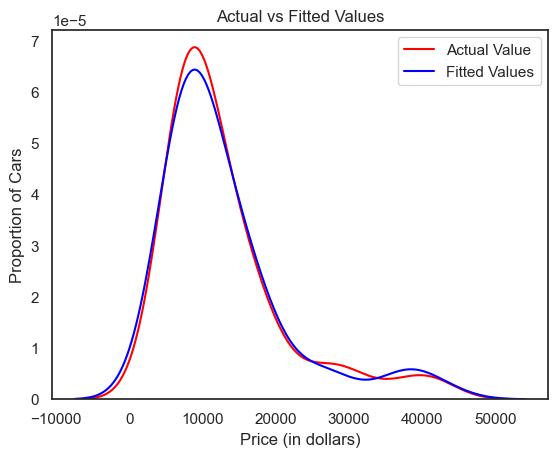

In [46]:
predicted=best.predict(X_test)
plot_dis(y_test,predicted)

#### Exercise 4
In this Exercise, calculate the 
 using the object Pipeline with GridSearch for each individual features.

diesel
gas
std
turbo
convertible
hardtop
hatchback
sedan
wagon
4wd
fwd
rwd
dohc
dohcv
l
ohc
ohcf
ohcv
rotor
eight
five
four
six
three
twelve
two
wheelbase
curbweight
enginesize
boreratio
horsepower
carlength
carwidth
citympg
highwaympg


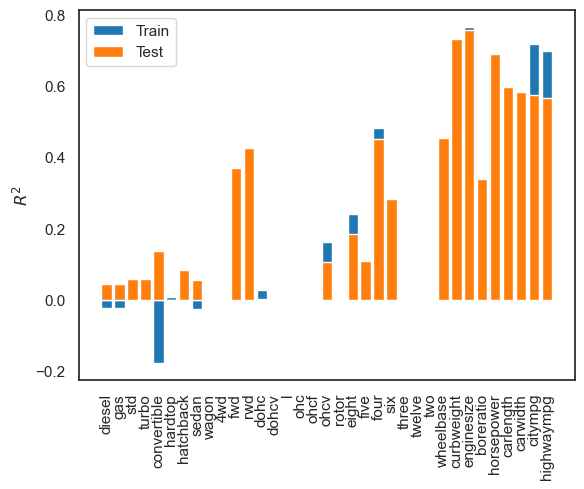

Training R^2 mean value 0.1870832324752193 Testing R^2 mean value 0.22041671563363394 
Training R^2 max value 0.765323637379124 Testing R^2 max value 0.7565151400968062 


In [47]:
features=list(X)


R_2_train=[]
R_2_test=[]

for feature in features:
    param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__positive":[True, False]}
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    print(feature)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_test[[feature]], y_test)
    best=search.best_estimator_

    R_2_test.append(best.score(X_test[[feature]],y_test))
    R_2_train.append(best.score(X_train[[feature]],y_train))


plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )